# 1w 作业

* 任务一：参数个数的计算。使用 $P(w_1, w_2) = P(w_2|w_1) * P(w_1)$ 分解句子并没有减少参数个数，为什么？
* 任务二：实现 N-gram 语言模型。使用 Python 实现 N-gram 语言模型，并观察生成的句子有什么样的变化？

## 1. 参数个数的计算。

**参考资料：**

* 多个条件概率的计算 [How can I calculate the conditional probability of several events? - Cross Validated](http://stats.stackexchange.com/questions/1564/how-can-i-calculate-the-conditional-probability-of-several-events).
* [Probabilistic Graphical Models (豆瓣)](https://book.douban.com/subject/4007200/)

之前不了解参数的概念，后面在 PGM 这本书找到了相关解释。

从 3.1.2 条件参数化方法这个例子里面，可以很清晰的看到，图 3.2 用 4 个参数就把整个联合分布表示出来了，而最后一个参数可以由前面的 3 个得到，所以最少 3 个参数就可以表示 P(w1,w2)，而在图 3.3 用 6 个参数表示 p(w1) 和 p(w2|w1)，因为都是二项式，所以也是最少 3 个参数。同样的，这样分解句子，肯定也不会减少参数的个数。

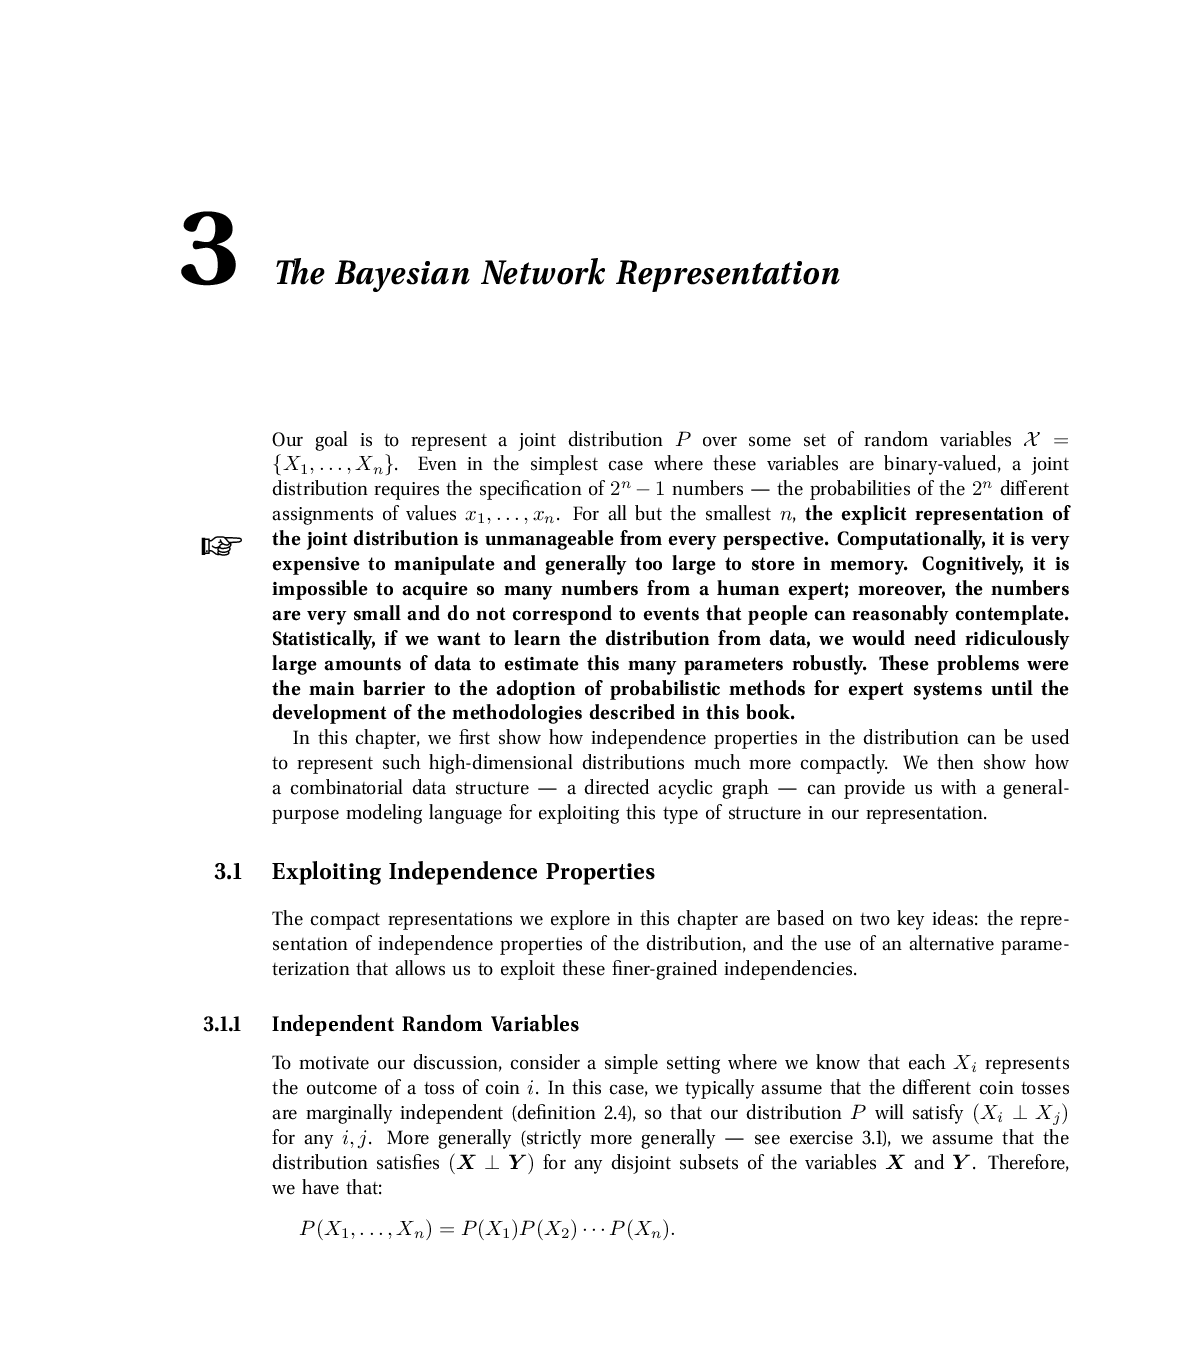

In [3]:
from IPython.display import Image
Image('data/pgm-0.png')

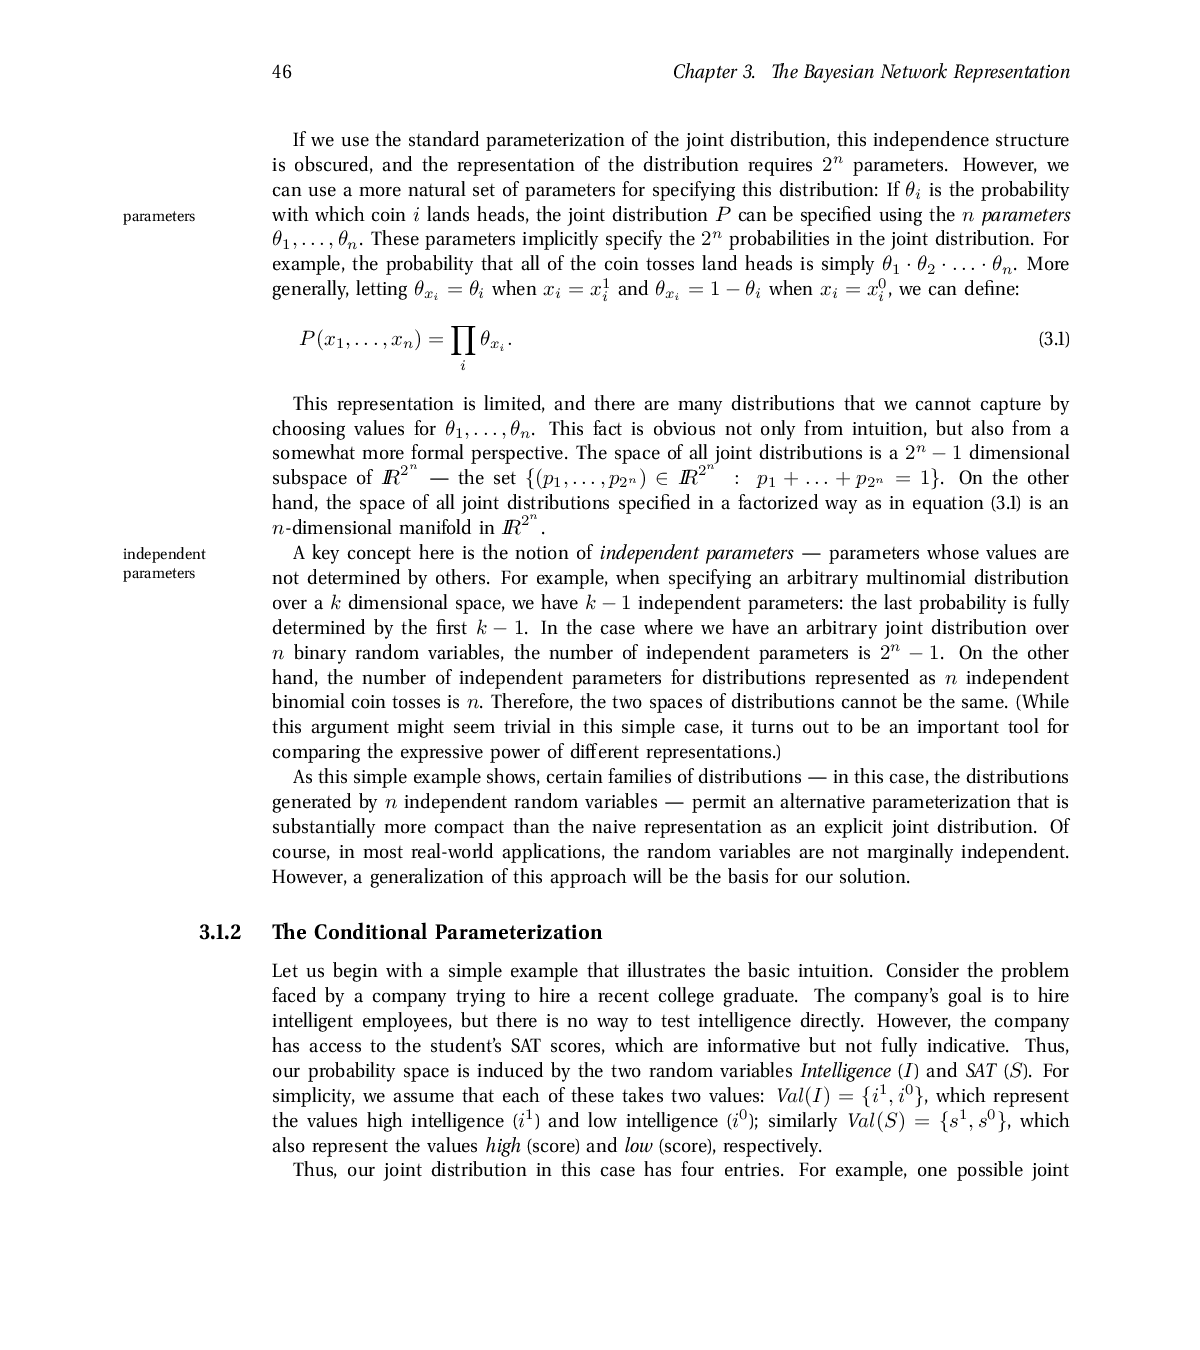

In [4]:
Image('data/pgm-1.png')

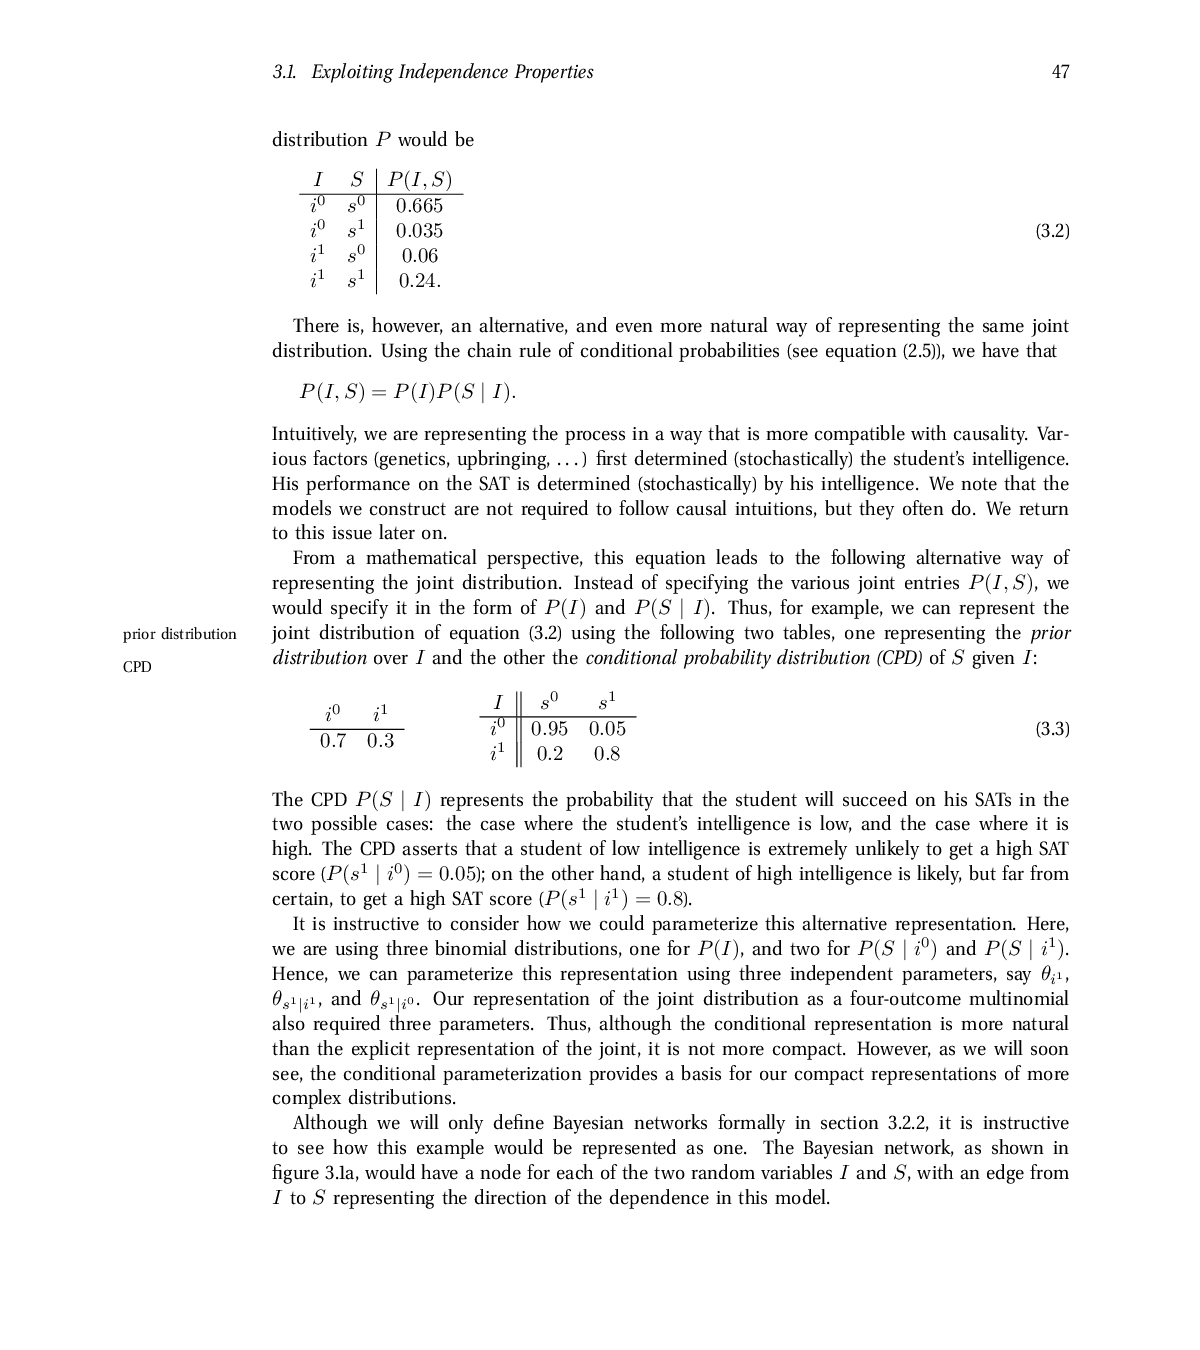

In [2]:
Image('data/pgm-2.png')

## 2. 实现 N-gram 语言模型

### 思路：

周日便把视频看完了，看到题目时，由于从概念到代码实现的断链，刚开始有点小懵。昨晚重新看了下后两节视频，里面重点提及了概率分布、Bigram，以及联想到课程的迭代概念，所谓 n-gram 应该就是 n 元词组的概念。

前两次代码已经实现了 Bigram 和 ugram，所以现在的难点就是如何实现 `2+`。

问题解决步骤：

1. 写一个函数支持输出 3 元词组以上，对其进行 Counter
2. 对 Counter 的 value 进行归一化
3. 用 random.random 的方式输出句子

### 2.1 词组函数

课程视频用遍历的方式已经演示了 bigram，但多个 for 循环让我看着有点晕，所以想找找更优美的实现方式，而 zip 完全可以做到。

* [Python零碎知识(2):强大的zip - BeginMan - 博客园](http://www.cnblogs.com/BeginMan/archive/2013/03/14/2959447.html) 这篇文章提到用 zip 的 * 号反转功能实现滑动窗口
* [Elegant n-gram generation in Python - Locally Optimal](http://locallyoptimal.com/blog/2013/01/20/elegant-n-gram-generation-in-python/) 这篇博文则讲的更详细

In [1]:
import jieba
from collections import Counter
import random

In [2]:
def find_ngrams(input_list, n):
  return list(zip(*[input_list[i:] for i in range(n)]))

└原理很简单，先做遍历，然后反转

In [3]:
lst = ['all', 'this', 'happened', 'more', 'or', 'less']
lst2 = 'a b c d e e e e'.split()

In [4]:
Counter(find_ngrams(lst2, 2))

Counter({('a', 'b'): 1,
         ('b', 'c'): 1,
         ('c', 'd'): 1,
         ('d', 'e'): 1,
         ('e', 'e'): 3})

### 2.2 读取文件
有了 Counter、ngram 生成器，接下来则是把分词加进去

把文件读成一个 str

In [5]:
with open('data/gu.txt', 'r') as f:
        data = f.read()

用结巴分词

In [6]:
lst = [i for i in jieba.cut(data)]

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.094 seconds.
Prefix dict has been built succesfully.


In [7]:
cnt = Counter(find_ngrams(lst, 3))

In [8]:
cnt.most_common(20)

[((' ', ' ', ' '), 938312),
 (('\n', ' ', ' '), 465996),
 (('”', '\n', ' '), 235812),
 (('。', '\n', ' '), 198551),
 (('道', '：', '“'), 138510),
 (('。', '”', '\n'), 123143),
 (('？', '”', '\n'), 70895),
 ((' ', ' ', '“'), 41672),
 (('：', '“', '你'), 33675),
 ((' ', ' ', '他'), 30847),
 (('，', '道', '：'), 24068),
 (('：', '“', '我'), 22028),
 (('！', '”', '\n'), 18302),
 (('了', '。', '”'), 16405),
 (('…', '…', '”'), 16230),
 (('…', '”', '\n'), 13909),
 (('了', '。', '\n'), 13709),
 ((' ', ' ', '她'), 12829),
 (('笑', '道', '：'), 12318),
 (('的', '。', '”'), 12271)]

把 cnt.value 做归一化

In [9]:
s = sum(cnt.values())

for key, value in cnt.items():
    cnt[key] /= s

In [10]:
cnt.most_common(10)

[((' ', ' ', ' '), 0.07054690482139035),
 (('\n', ' ', ' '), 0.035035868089876944),
 (('”', '\n', ' '), 0.01772950438632534),
 (('。', '\n', ' '), 0.014928039393284829),
 (('道', '：', '“'), 0.01041386211282684),
 (('。', '”', '\n'), 0.009258495575480726),
 (('？', '”', '\n'), 0.005330234311521614),
 ((' ', ' ', '“'), 0.003133105638334561),
 (('：', '“', '你'), 0.00253185189985881),
 ((' ', ' ', '他'), 0.0023192289697088263)]

### 2.3 生成句子

In [11]:
def generate(cnt):
    r = random.random()
    s_ = 0.0
    for word, prob in cnt.items():
        s_ += prob
        if s_ >= r:
            return word

In [12]:
''.join(generate(cnt))

'   '

In [13]:
s = ''
for i in range(100):
    word = ''.join(generate(cnt))
    s += word
print(s)

妇人是谁  她，因为她：“我为的什么…”
三个孤岛上面：
 道理的。   声音，门里   他不停的娇嫩……，用手指忽然停住，”
 ，石雁却，奔到火堆放了下来过他的
   但世上  他虾也没有你明明也   我。”起来，简虎枯梅大师的什么酒？   ，直到此刻 郭定冷笑这个孩子的女婿。”绝不能冒一点个混蛋呢  此刻人全都知道这就是武当头睡在又诱惑的自己方才那被激动的我小时读书人以为他。雷鞭老人，他没有看到他。着笼中。
 他不解地道：“的那么多的汗珠，有你在昨夜有激情   绚丽而归于不共戴天的仇人”
 五虎断门刀彭天寿   放声而来刚才只不过想是崭新的。
 接口道：你这一向心计却是歹毒蓝天猛说你、四冷盘。
 的床上，的古道上心头一震，没有四条腿哪一位？”你老人家便是很久，此点？”的人会是      我有样东西下首坐了已久久没有道：“不禁暗骇：他虽对中原，此番成了习惯   断定，这些   合潗 先生武功极高   就好像软


### 2.4 改善性能

结巴分词很好，但速度挺慢，每次运行程序都要很长时间，用 `htop` 查看发现是只有一个核完全被用了，所以想改善下代码，充分发挥 4 核服务器的性能

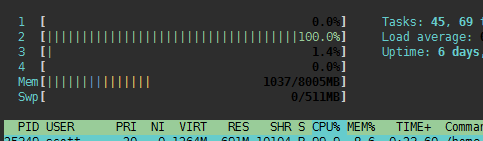

In [5]:
from IPython.display import Image
Image('data/htop.png')

In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import jieba
import time

def test_segment(parallel=False):
    """
    """
    if parallel:
        jieba.enable_parallel(4)
    start = time.time()
    with open('data/gu.txt') as f:
            words = jieba.cut(f.read())
            " ".join(words)
    print('parallel:%s, time elapsed:%f second' % (parallel, time.time() - start))


def main():
    """
    """
    test_segment()
    test_segment(True)

    
main()

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.076 seconds.
Prefix dict has been built succesfully.


parallel:False, time elapsed:135.011034 second
parallel:True, time elapsed:42.659158 second


经过上方的官方测试代码发现,多进程对速度有明显改善

```
parallel:False, time elapsed:135.011034 second
parallel:True, time elapsed:42.659158 second
```

### 2.5 完整代码

[代码地址](ngram.py)

In [10]:
import random
import jieba
from collections import Counter

In [11]:
def jieba_cut(filename):
    """Return list with jieba.cut."""
    jieba.enable_parallel(4)
    with open(filename, 'r') as f:
        data = f.read()
        lst = [i for i in jieba.cut(data)]
    return lst


def find_ngrams(lst, n):
    return list(zip(*[lst[i:] for i in range(n)]))


def normalization(lst):
    cnt = Counter(lst)
    s = sum(cnt.values())
    for key, value in cnt.items():
        cnt[key] /= s
    return cnt


def generate_word(cnt):
    r = random.random()
    s_ = 0.0
    for word, prob in cnt.items():
        s_ += prob
        if s_ >= r:
            return word


def generate_text(cnt):
    s = ''
    for i in range(100):
        word = ''.join(generate_word(cnt))
        s += word
    print(s)

看看金庸小说的效果

In [12]:
lst = jieba_cut('data/jin.txt')

In [13]:
ngram_list = find_ngrams(lst, 3)

In [14]:
cnt = normalization(ngram_list)

In [19]:
generate_word(cnt)

('脸色', '微变', '。')

In [20]:
generate_text(cnt)

伤痕，连抽去。于你？未必弄得碎乱了，心道：要害，倒饮滇池，打了数下狠心短命的妈妈的亲生女儿近，钟罄人都是迁移。计，道： 公孙止和瞧瞧。”   ，为师决无”字，中尚有二百余分批过来…牌九，那有除此之外也无别法，不愿跟：“那时过后，就。
 住，但凝神间，了个难解难分武艺，要害这般摔一交便一句句恶毒的杀却灭口来，原来打量了几眼好本事！记起伯父他们一个个练功给宫里的我死不瞑目么，轰轰汹汹
  玩耍，这在我身上扑，六具定有一人为首应道：“我……再嚷，小题大做，每天相斗，和风声，日后王之女的妖法他与众己方伤了：“行写着八个 次日韦小宝，在下干什么？难道失手，只求
  次日，陈家洛五云手’，两名番僧由于揣摸到清清楚楚？”使个眼色，被暖水一冲“我们这位突然间半空中，暗想：一招，笑过来坐在石万嗔了！”头昏脑胀，黄蓉”虚竹道这中间古怪，否则可是你罗嗦什么的剑法来“说到一步，我离身逐他，，大为欢喜公孙止将她流露得十分我三百八十万两银子“我不待会就用不道又在 令狐冲道我叔叔、的胆囊，郭芙本来道：“狼皮给我，当下一声不响


### 2.6 待改进的点：

* 让句子更自然些
* 分词速度加快
* 数据清理